In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5923108700464375541
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14596668375621701450
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# Driva ile Bağlantı

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/bin/bash: google-drive-ocamlfuse: command not found
drive  sample_data


In [5]:
!ls drive

MyDrive


# Mevcut Dizine Yerleşildi

In [6]:
import os
os.chdir('/content/drive/My Drive/image-classification')


In [ ]:
!pwd

/content/drive/My Drive/image-classification


In [ ]:
!ls

dataset  model.h5  train.ipynb	vgg16.ipynb


# Gerekli Kütüphanelerin İmport Edilmesi

In [7]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split  # Veri Setini train - test - validation olarak ayırmak için gerekli
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, Dropout  # layers 
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical


In [8]:
path = "dataset"
myList = os.listdir(path)
numberOfClasses = len(myList)

# Dataset üzerinden resimleri ve resimlerin kategorilerinin belirlenmesi

In [9]:
images = []
classNumber = []

for i in range(numberOfClasses):
    imageList = os.listdir(path + "/" + str(i))
    for j in imageList:
        img = cv2.imread(path + "/" + str(i) + "/" + j)
        img = cv2.resize(img, (200,200))
        images.append(img)
        classNumber.append(i)

In [10]:
print(len(images))
images = np.array(images)
images.shape

2980


(2980, 200, 200, 3)

In [11]:
print(len(classNumber))
classNumber=np.array(classNumber)
print(classNumber.shape)

2980
(2980,)


# Dataset'in Train - Test - Validation Olarak Ayrılması

In [12]:
x_train, x_test, y_train, y_test = train_test_split(images,classNumber, test_size = 0.3, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train, test_size = 0.3, random_state=42)

In [13]:
print(images.shape)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(2980, 200, 200, 3)
(1460, 200, 200, 3)
(894, 200, 200, 3)
(626, 200, 200, 3)


# Normalizasyon İşlemi

In [14]:
def normalizasyon(img):
    img = (img /255) 
    return img

In [15]:
x_train = np.array(list(map(normalizasyon,x_train)))
x_test = np.array(list(map(normalizasyon,x_test)))
x_validation = np.array(list(map(normalizasyon,x_validation)))

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(1460, 200, 200, 3)
(894, 200, 200, 3)
(626, 200, 200, 3)


# Veri Çoğalma İşlemi

In [17]:
dataGen = ImageDataGenerator(width_shift_range= 0.1, #yanlara %10 kaydırma işlemi
                             height_shift_range = 0.1, # yukarı ve aşağı %10 kaydırma işlemi
                             zoom_range = 0.1, # yakınlaştırma işlemi %10
                             rotation_range = 10) # döndürme işlemi 10 derece

In [18]:
dataGen.fit(x_train)

# One Hot Encoder


In [19]:
y_train = to_categorical(y_train,numberOfClasses) # one hot encoder sınıflandırma için gerekli 
y_test = to_categorical(y_test,numberOfClasses)
y_validation = to_categorical(y_validation,numberOfClasses)

In [20]:
print(y_train.shape)
print(y_train)

(1460, 4)
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


# CNN Katmanlarının Oluşturulması


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters =16 , kernel_size = (5,5), activation = "relu", padding = "same"))
model.add(Conv2D(filters =32 , kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters =64 , kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters =128 , kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(units=numberOfClasses, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 200, 200, 16)      1216      
                                                                 
 conv2d_17 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 128)      

# Kayıp Fonksiyonunun ve Optimizer'ın Atanması

In [ ]:
model.compile(loss= "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])

# Eğitim İşlemi

In [ ]:
batch_size = 64

hist = model.fit_generator(dataGen.flow(x_train,y_train,batch_size=batch_size),
                                        validation_data = (x_validation, y_validation),
                                          epochs=100,steps_per_epoch = x_train.shape[0]//batch_size, shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
22/22 [==============================] - 15s 638ms/step - loss: 1.4016 - accuracy: 0.2529 - val_loss: 1.3882 - val_accuracy: 0.2332
Epoch 2/100
22/22 [==============================] - 13s 564ms/step - loss: 1.3609 - accuracy: 0.3059 - val_loss: 1.3528 - val_accuracy: 0.2955
Epoch 3/100
22/22 [==============================] - 12s 562ms/step - loss: 1.3458 - accuracy: 0.3152 - val_loss: 1.3746 - val_accuracy: 0.2556
Epoch 4/100
22/22 [==============================] - 12s 551ms/step - loss: 1.3544 - accuracy: 0.3145 - val_loss: 1.3142 - val_accuracy: 0.3978
Epoch 5/100
22/22 [==============================] - 12s 545ms/step - loss: 1.2985 - accuracy: 0.3897 - val_loss: 1.2704 - val_accuracy: 0.4265
Epoch 6/100
22/22 [==============================] - 12s 551ms/step - loss: 1.2585 - accuracy: 0.4140 - val_loss: 1.1676 - val_accuracy: 0.5064
Epoch 7/100
22/22 [==============================] - 12s 552ms/step - loss: 1.2074 - accuracy: 0.4606 - val_loss: 1.1736 - val_accuracy:

# Eğitilmiş olan modelin kaydedilmesi

In [ ]:
model.save('model.h5')

# Eğitilen Modelin Accuracy ve Loss Grafikleri

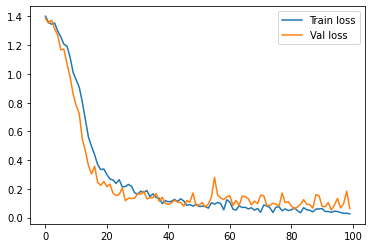

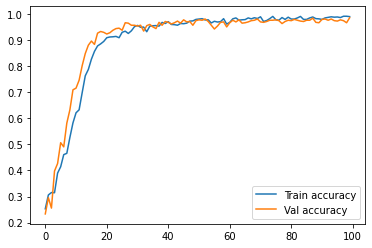

28/28 [==============================] - 1s 31ms/step - loss: 0.0885 - accuracy: 0.9810
Test loss: 0.0885460302233696
Test accuracy: 0.9809843301773071


In [ ]:
hist.history.keys()

import matplotlib.pyplot as plt # görselleştirmek için
plt.figure()
plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(hist.history["accuracy"],label = "Train accuracy")
plt.plot(hist.history["val_accuracy"],label = "Val accuracy")
plt.legend()
plt.show()

score = model.evaluate(x_test,y_test,verbose = 1)
print("Test loss:" , score[0])
print("Test accuracy:" , score[1])